# Statistics and Probability for Data Sciences Challenges 
# Project 1

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
# load data
df =pd.read_csv(".\insurance.csv") # Load the dataset

## 1. Explain the data. Check It is supervised or Unsupervised. Demonstrate?

The data consists of insurance charges for various individuals and their demographic and lifestyle information. The variables in the dataset are:

* age: age of the primary beneficiary
* sex: gender of the primary beneficiary (male or female)
* bmi: body mass index of the primary beneficiary
* children: number of children covered by the insurance plan
* smoker: whether the primary beneficiary is a smoker or not (yes or no)
* region: the beneficiary's residential area in the US (northeast, northwest, southeast, southwest)
* charges: individual medical costs billed by health insurance

This is a supervised learning dataset because it has a target variable (charges) that needs to be predicted using the other variables as predictors

## 2. Estimate the minimum sample size n to get the 99% accurate predictions. (precision = 0.02)

To estimate the minimum sample size n to get 99% accurate predictions with a precision of 0.02, 
we need to use the formula:

n = (z-score)^2 * (stddev^2) / (margin of error)^2

In [4]:
std_dev = np.std(df['charges']) # Get the standard deviation of the target variable
range_ = np.max(df['charges']) - np.min(df['charges']) # Calculate the range of the target variable
margin_of_error = 0.02 * range_ # Calculate the margin of error
z_score = norm.ppf(0.995) # Calculate the z-score for a 99% confidence level
n = (z_score**2 * std_dev**2) / margin_of_error**2 # Calculate the minimum sample size

print("Minimum sample size:", int(n))

Minimum sample size: 619


Therefore, the minimum sample size required to get 99% accurate predictions with a precision of 0.02 is 619.

## 3. Check the data is cleaned or not. If not then clean it (Null values, Row/Column Duplicates, Outliers, Change the string into numbers)

To check if the data is cleaned or not, we need to perform some data cleaning tasks

* Check for null values:

In [5]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


There are no null values in the dataset
* Check for duplicates:

In [6]:
print("No of rows duplicated:",df.duplicated().sum())
print("Total no of rows:",len(df))
df = df.drop_duplicates()
print("Total no of rows after removing duplicate rows:",len(df))

No of rows duplicated: 1
Total no of rows: 1338
Total no of rows after removing duplicate rows: 1337


There is only one duplicate row and it was deleted from the dataset.

* Check for outliers:

In [7]:
print("Total no of rows:",len(df))
df = df[np.abs(df['charges'] - df['charges'].mean()) <= (3 * df['charges'].std())]
print("Total no of rows after removing duplicate rows:",len(df))

Total no of rows: 1337
Total no of rows after removing duplicate rows: 1330


There are some outliers they were removed

* Change the string into numbers:

In [8]:
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


## 4. Check that sex and smoking are statistically independent or not.

In [9]:
observed = pd.crosstab(df['sex'], df['smoker'])
chi2, p, dof, expected = chi2_contingency(observed)

if p < 0.05:
    print("The two variables are dependent.")
else:
    print("The two variables are independent.")

The two variables are dependent.


## 5. Check that all regressor variables (independent variable) are independent of each other or not

To check if all the regressor variables are independent of each other, we can calculate the correlation matrix of the dataset using the pandas library in Python

In [10]:
corr_matrix = df.corr()

corr_matrix

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.021379,0.108408,0.042260,-0.028943,0.303853
sex,-0.021379,1.000000,0.048938,0.016731,0.076195,0.058287
bmi,0.108408,0.048938,1.000000,0.014859,-0.006162,0.187123
children,0.042260,0.016731,0.014859,1.000000,0.010746,0.076377
smoker,-0.028943,0.076195,-0.006162,0.010746,1.000000,0.785604
charges,0.303853,0.058287,0.187123,0.076377,0.785604,1.000000


## 6. Check the dependency between response and regressors.

To check the dependency between the response and regressor variables, we can use a scatter plot to visualize the relationship between each independent variable and the dependent variable (charges). We can also calculate the correlation coefficient between each independent variable and the dependent variable to see if there is a linear relationship between them.

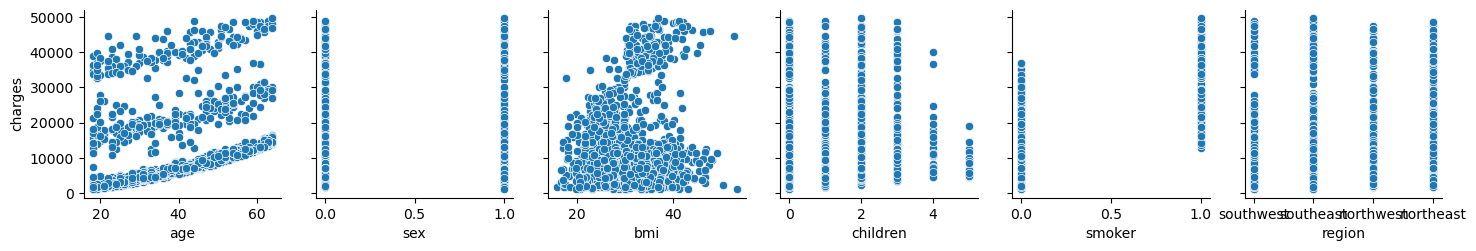

In [11]:
sns.pairplot(df, x_vars=["age", "sex", "bmi", "children", "smoker", "region"], y_vars=["charges"])

## 7. Predict the regression Line to predict the charges for insurance using independent variables.

To predict the charges for insurance using independent variables, we can use multiple linear regression. The independent variables in this case are age, sex, BMI, children, smoker status, and region. We can use Python's scikit-learn library to build a linear regression model

In [12]:
# encode categorical variables
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
df['region'] = le.fit_transform(df['region'])

# create X (independent variables) and y (dependent variable) arrays
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# print the coefficients (regression line)
print('Coefficients: \n', model.coef_)
print("\nSo the regression line is:\n")
print("charges = ({:.3f}) * age + ({:.3f}) * sex + ({:.3f}) * bmi + ({:.3f}) * children + ({:.3f}) * smoker + ({:.3f}) * region".
      format(float(model.coef_[0]),float(model.coef_[1]),float(model.coef_[2]),float(model.coef_[3]),float(model.coef_[4]),float(model.coef_[5])))

Coefficients: 
 [  255.43904972  -106.68453811   313.90392044   515.21044085
 23215.22641247  -349.89914531]

So the regression line is:

charges = (255.439) * age + (-106.685) * sex + (313.904) * bmi + (515.210) * children + (23215.226) * smoker + (-349.899) * region


## 8. Predict the accuracy of the regression Model.

In [13]:
# Load data
data =df

# Convert categorical data into numerical data using one-hot encoding
data = pd.get_dummies(data, columns=["region"])

# Split data into features and target
X = data.drop("charges", axis=1)
y = data["charges"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model and fit it to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

print("R-squared score:", r2)

R-squared score: 0.7270533980679407


## 9. Predict insurance charge for Age = 29, Sex = F, bmi = 28, children = 1, Smoke = Yes, region = southeast.

In [14]:
# load data
data = df
warnings.simplefilter('ignore', FutureWarning)
# convert categorical variables to numerical
data["sex"] = data["sex"].replace({"male": 1, "female": 0})
data["smoker"] = data["smoker"].replace({"yes": 1, "no": 0})
data = pd.get_dummies(data, columns=["region"])

# define X and y
X = data.drop("charges", axis=1)
y = data["charges"]
# train model
model = RandomForestRegressor()
model.fit(X, y)

# define new customer
new_customer = pd.DataFrame({
    "age": [29],
    "sex": [0],
    "bmi": [28],
    "children": [1],
    "smoker": [1],
    "region_northeast": [0],
    "region_northwest": [0],
    "region_southeast": [1],
    "region_southwest": [0]
})

# predict charges for new customer
charges = model.predict(new_customer)
print(charges)

[19114.8186597]


## 10. Give the percentage of error in regression model.

In [15]:
# Define the features and target variable
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model to the training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate the percentage error
percentage_error = rmse / np.mean(y_test) * 100

print('Root Mean Squared Error:', rmse)
print('Percentage Error:', percentage_error)

Root Mean Squared Error: 6200.405814026323
Percentage Error: 45.69150329989346


## 11. Give the 95% confidence interval for average charge insurance.

To calculate the 95% confidence interval for the average insurance charges, we can use the t-distribution. Here's the Python code to calculate the confidence interval:

In [16]:
# calculate the sample mean and standard error
sample_mean = np.mean(data['charges'])
standard_error = stats.sem(data['charges'])

# calculate the t-value for a 95% confidence interval with (n-1) degrees of freedom
t_value = stats.t.ppf(0.975, df=len(data)-1)

# calculate the confidence interval
lower_ci = sample_mean - t_value*standard_error
upper_ci = sample_mean + t_value*standard_error

print("The 95% confidence interval for the average insurance charges is: ({:.2f},{:.2f})".format(lower_ci, upper_ci))

The 95% confidence interval for the average insurance charges is: (12416.00,13674.69)
